In [22]:
import speech_recognition as sr
import numpy as np

In [2]:
%pwd

'/home/howard/ML_audio'

In [3]:
for index, name in enumerate(sr.Microphone.list_microphone_names()):
    print(index, name)

0 HDA Intel HDMI: 0 (hw:0,3)
1 HDA Intel HDMI: 1 (hw:0,7)
2 HDA Intel HDMI: 2 (hw:0,8)
3 HDA Intel HDMI: 3 (hw:0,9)
4 HDA Intel HDMI: 4 (hw:0,10)
5 HDA Intel PCH: ALC269VC Analog (hw:1,0)
6 hdmi
7 pulse
8 default


In [7]:
# obtain audio from the microphone
r = sr.Recognizer()
with sr.Microphone() as source:
    print("Say something!")
    audio = r.listen(source)

Say something!


KeyboardInterrupt: 

In [8]:
print("Google Speech Recognition thinks you said:\n" , r.recognize_google(audio))

Google Speech Recognition thinks you said:
 hands on machine learning with scikit-learn and tensorflow


In [64]:
# obtain audio from the microphone for 5 seconds
# fsam= 40khz
r = sr.Recognizer()
fsam=40000
with sr.Microphone(sample_rate=fsam) as source:
    audio_f = r.record(source,duration=5)

In [65]:
byte_data_1=audio_f.get_wav_data()

In [66]:
len(byte_data_1)

399404

In [96]:
byte_data_1[44:50]

b'\xf6\xff\x16\x00\xed\xff'

In [93]:
399360+44

399404

In [67]:
data_list=list(byte_data_1)

In [81]:
len(data_list)/2

199702.0

In [83]:
audio_ary=np.array(data_list)

In [97]:
for i in range(44,50,2):
    print(audio_ary[i])
    print(audio_ary[i+1])

246
255
22
0
237
255


In [70]:
result.shape

(399404,)

In [71]:
result.shape[0]

399404

In [72]:
NSample=2000

r  =(result.shape[0])-NSample
rr =result.shape[0]

In [73]:
print(r)
print(rr)

397404
399404


In [74]:
yy=result[r:rr]

totalN=80000
yyy=np.pad(yy,(0,totalN-NSample),'constant')

In [75]:
len(yyy)

80000

In [76]:
T=1/fsam
stop=(totalN-1)*T
t=np.linspace(0,stop,totalN)

In [77]:
import matplotlib.pyplot as plt

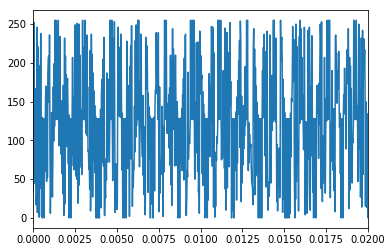

In [78]:
plt.xlim(0,0.02)
plt.plot(t,yyy)

In [59]:
from scipy import fftpack
faX=fftpack.fft(yyy)
Xc=faX*T
Xcabs=np.abs(Xc)

In [60]:
freqs=fftpack.fftfreq(totalN,T)
np.max(Xcabs)

6.363250000000001

In [61]:
peak_result=np.where(Xcabs==np.max(Xcabs))
peak_index=peak_result[0][0]
print('The frequency is :' ,freqs[peak_index])

The frequency is : 0.0


## audio_f  is  the AudioData
## use get_wav_data() and   f.write to write into wav     

In [79]:
with open("microphone-results.wav", "wb") as f:
    f.write(audio_f.get_wav_data())

## use bmp17.exe   to extract the audio data part

In [90]:
!./bmp17.exe  microphone-results.wav

This program is to extract the audio data of the WAV file of microphone-results.wav
and generate the sampled audio values into a file out.data
  0   1   2   3 --- 52  49  46  46  
  4   5   6   7 --- 24  18  06  00  RIFF chunk size=399396
  8   9  10  11 --- 57  41  56  45  
 12  13  14  15 --- 66  6d  74  20  
 16  17  18  19 --- 10  00  00  00  
 20  21  22  23 --- 01  00  01  00  PCM=1, Num of channel=1
 24  25  26  27 --- 40  9c  00  00  sampling rate fs=40000, Sampling time Ts= 0.0000250
 28  29  30  31 --- 80  38  01  00  byte rate=80000
 32  33  34  35 --- 02  00  10  00  bits per sample=16
 36  37  38  39 --- 64  61  74  61  
 40  41  42  43 --- 00  18  06  00  audio number of byte=399360
wav file current positon =44
Starting reading data now at this position...!


total readin 199680 data !! each data is two bytes !! 
cause read in tt= 0 less than two bytes!!
total record time is 199680 x  0.0000250    4.992 second


In [22]:
399360+44

399404

In [23]:
199680*2

399360

In [18]:
# freq_analyz.py  is  from  pr1.py  
# use SCIPY module to get the frequency
import freq_analyz

In [87]:
freq_analyz.get_freq('out.data',40000)

The frequency is : 1234.0
